In [2]:
from bs4 import BeautifulSoup
import urllib.request as REQ
import folium
import urllib
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False
warnings.simplefilter('ignore')

In [32]:
data14=pd.read_csv(r'2014년 졸음운전 교통사고.csv',engine='python')
data15=pd.read_csv(r'2015년 졸음운전 교통사고.csv',engine='python')
data16=pd.read_csv(r'2016년 졸음운전 교통사고.csv',engine='python')
year14=pd.DataFrame(data14)
year15=pd.DataFrame(data15)
year16=pd.DataFrame(data16)

In [37]:
year16

구분  사고(건)  사망(명)  부상(명)
0    2016년1월    192      5    387
1    2016년2월    174      6    328
2    2016년3월    217      7    435
3    2016년4월    216      7    419
4    2016년5월    239     13    522
5    2016년6월    200     12    362
6    2016년7월    227      9    460
7    2016년8월    230      7    490
8    2016년9월    187     13    347
9   2016년10월    183     10    367
10  2016년11월    200      5    418
11  2016년12월    168      4    364

In [55]:
m=pd.concat([year14,year15,year16])
m


m['년']=m['구분'].apply(lambda v:v.split('년')[0])
m['월']=m['구분'].apply(lambda v:v.split('년')[1])
m1=m.pivot_table(index=['년','월'])


In [56]:
m1

부상(명)  사고(건)  사망(명)
년    월                       
2014 10월    392    210     14
     11월    386    209     10
     12월    329    178     12
     1월     347    169      7
     2월     268    145      3
     3월     358    206     12
     4월     360    182      4
     5월     474    218     17
     6월     457    233     13
     7월     431    229     14
     8월     447    222      9
     9월     430    225     15
2015 10월    475    214     14
     11월    398    199      3
     12월    428    213      8
     1월     375    205      8
     2월     375    175      8
     3월     492    237      4
     4월     486    227     10
     5월     504    231      9
     6월     401    207      8
     7월     556    273      7
     8월     534    268     19
     9월     501    252     10
2016 10월    367    183     10
     11월    418    200      5
     12월    364    168      4
     1월     387    192      5
     2월     328    174      6
     3월     435    217      7
     4월     419    216      7
     5월     522    239     13
     6월     362    200     12
     7월     460    227      9
     8월     490    230      7
     9월     347    187     13

In [66]:
m1.loc['2016']['사망(명)']/m1.loc['2016']['사고(건)']

월
10월    0.054645
11월    0.025000
12월    0.023810
1월     0.026042
2월     0.034483
3월     0.032258
4월     0.032407
5월     0.054393
6월     0.060000
7월     0.039648
8월     0.030435
9월     0.069519
dtype: float64

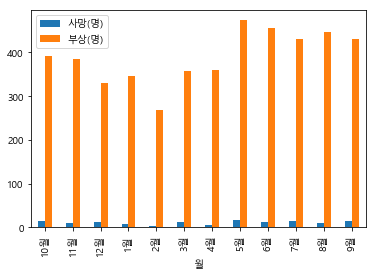

In [76]:
m1.loc['2014'][['사망(명)','부상(명)']].plot(kind='bar')
plt.show()

In [74]:
new4=m1.loc['2016']['사망(명)']/m1.loc['2015']['사망(명)']
new4[new4.max()==new4]

월
3월    1.75
Name: 사망(명), dtype: float64